# Clustering using K-means Crime data

In [19]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [20]:
#load the dataset

In [21]:
df=pd.read_csv('crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [22]:
df.drop(df.columns[0], axis=1,inplace=True)
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


# EDA

In [23]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [24]:
df.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [25]:
df.duplicated().sum()

0

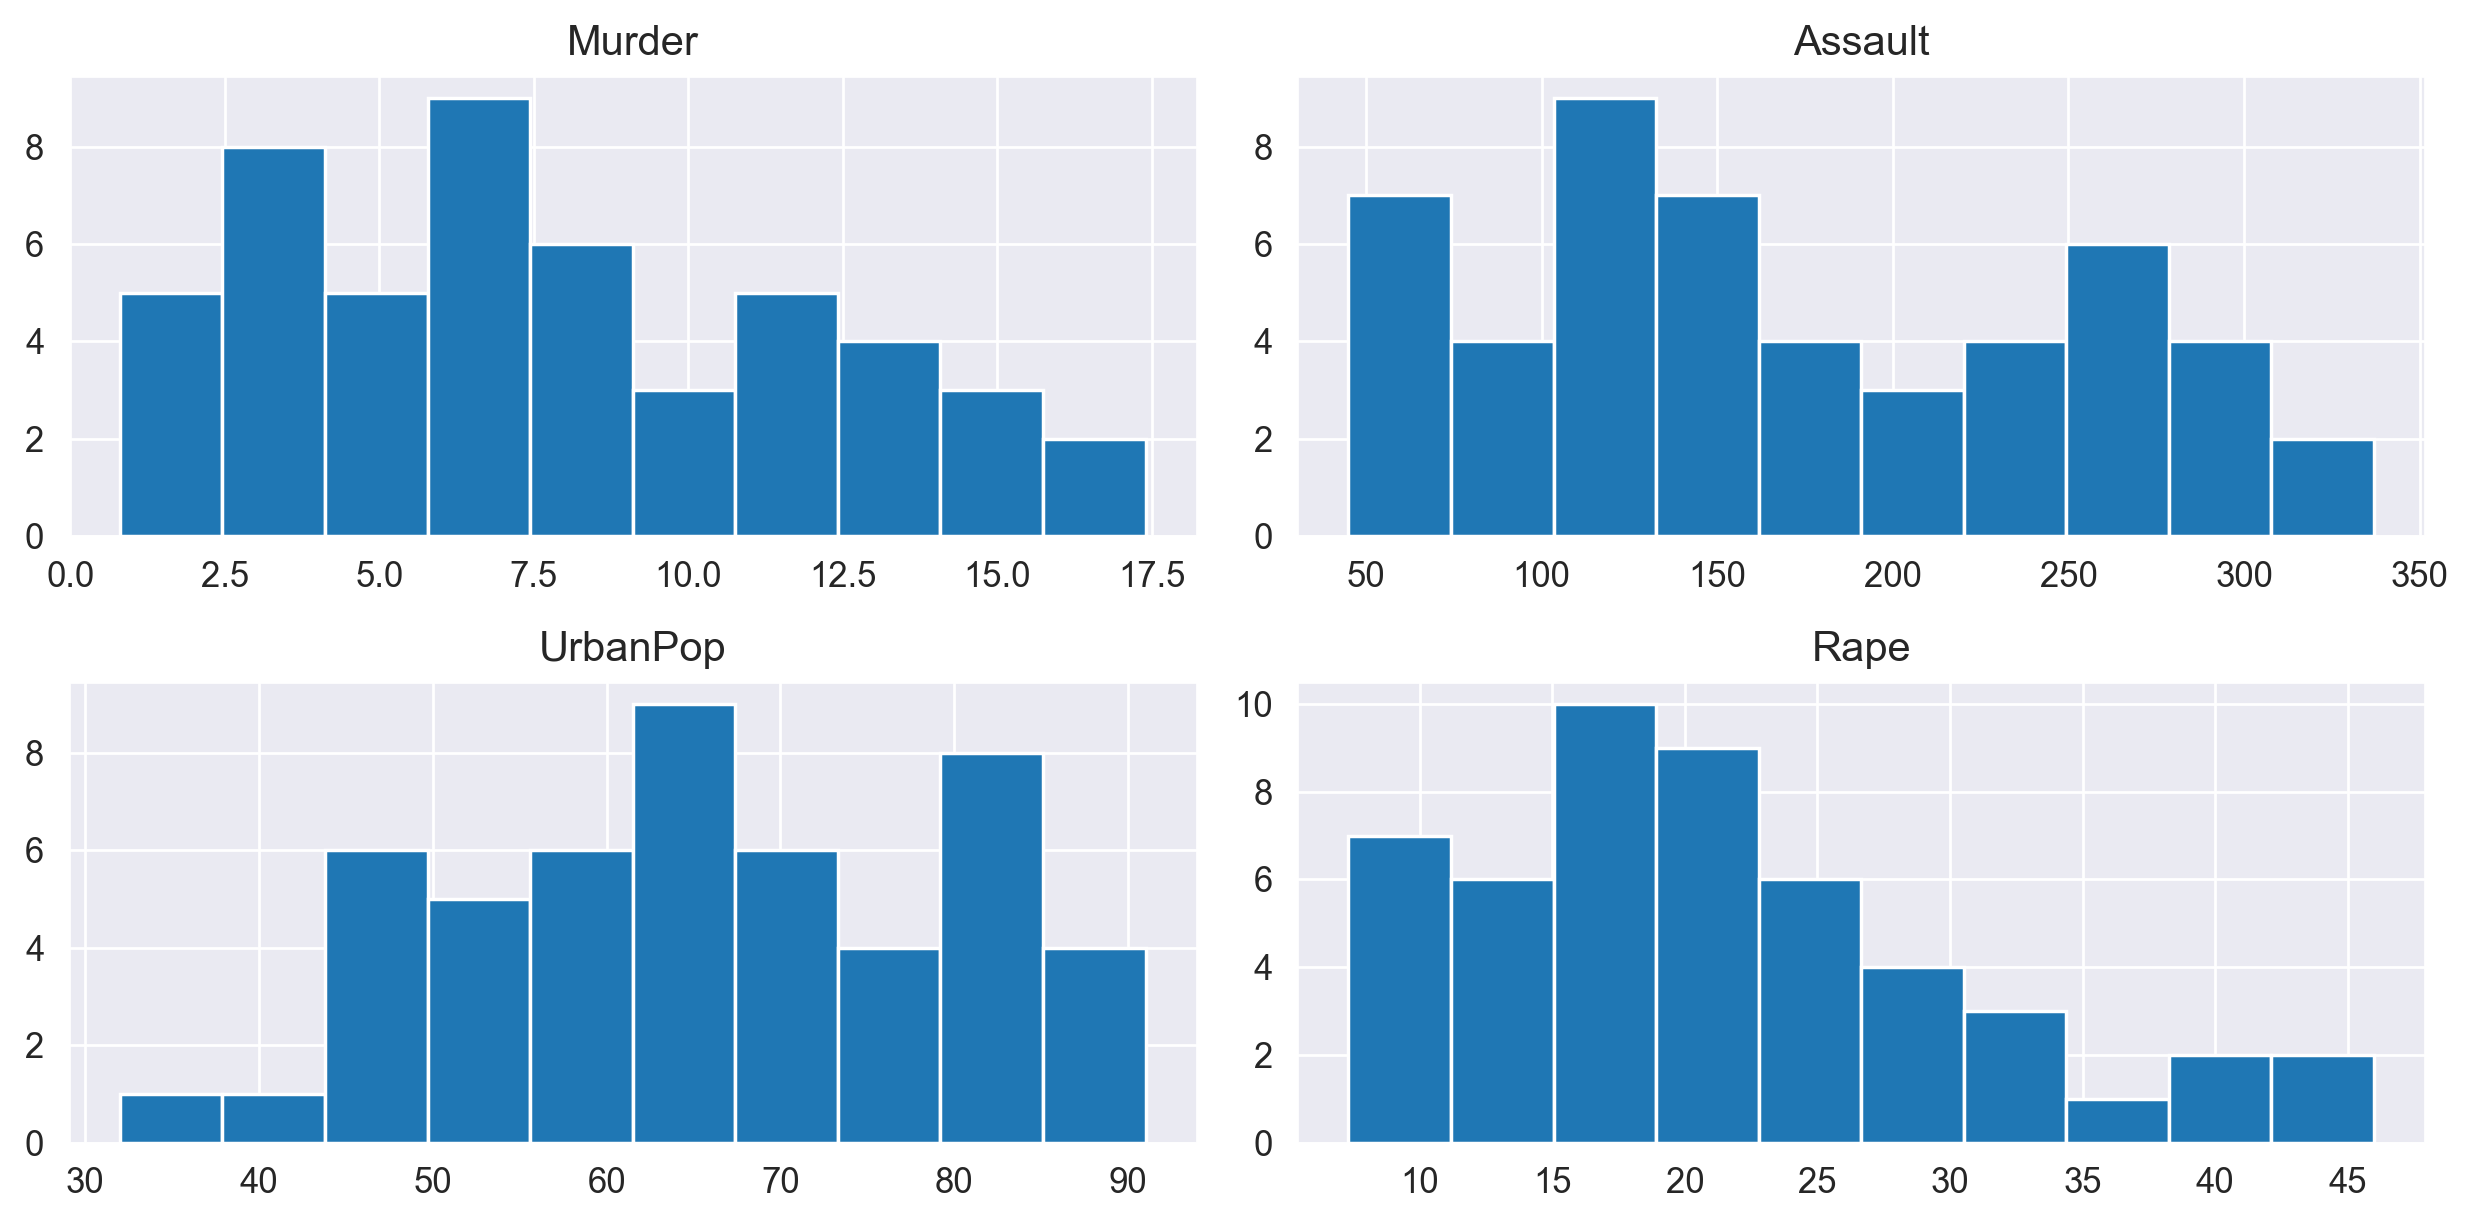

In [26]:
df.hist()
plt.tight_layout()

<Axes: xlabel='Murder'>

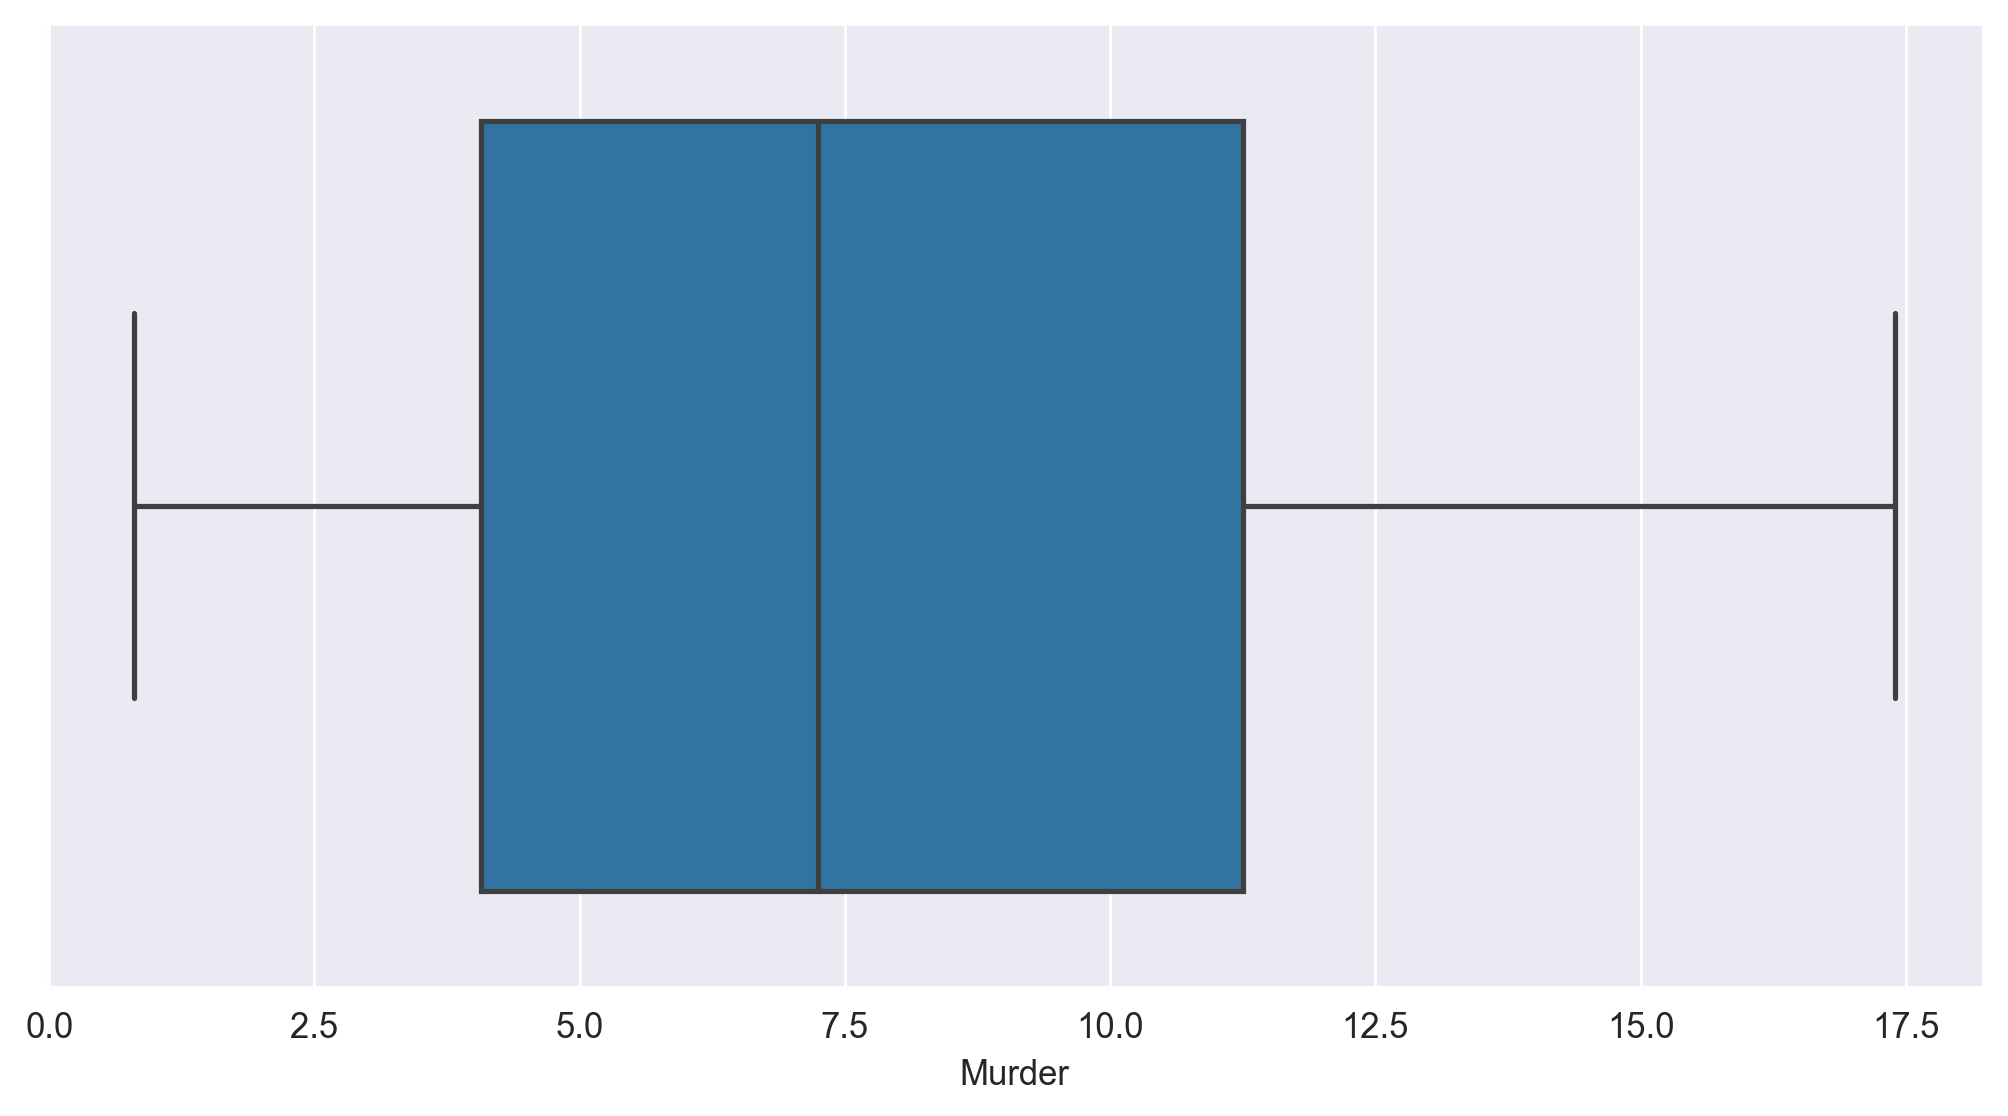

In [27]:
sns.boxplot(x=df['Murder'])

<Axes: xlabel='Assault'>

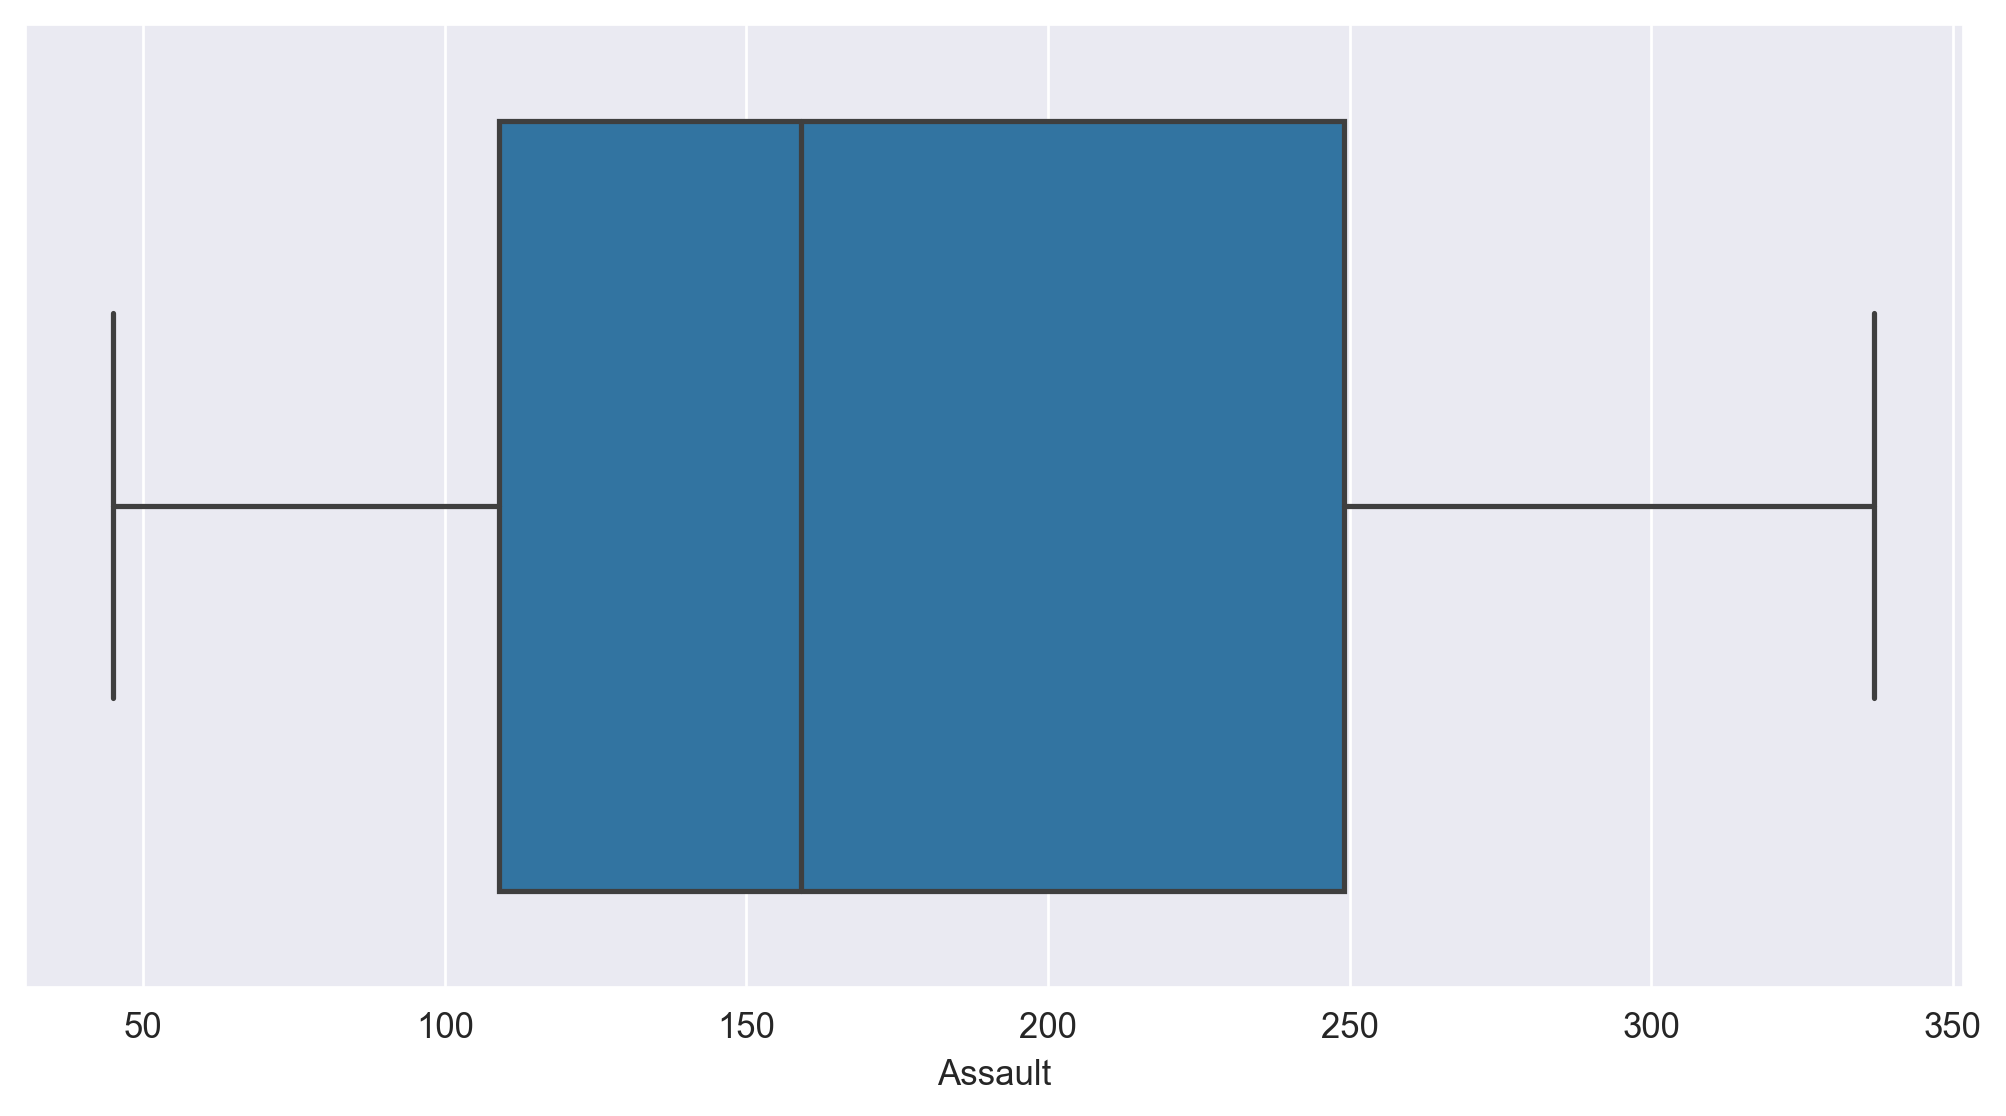

In [28]:
sns.boxplot(x=df['Assault'])

<Axes: xlabel='UrbanPop'>

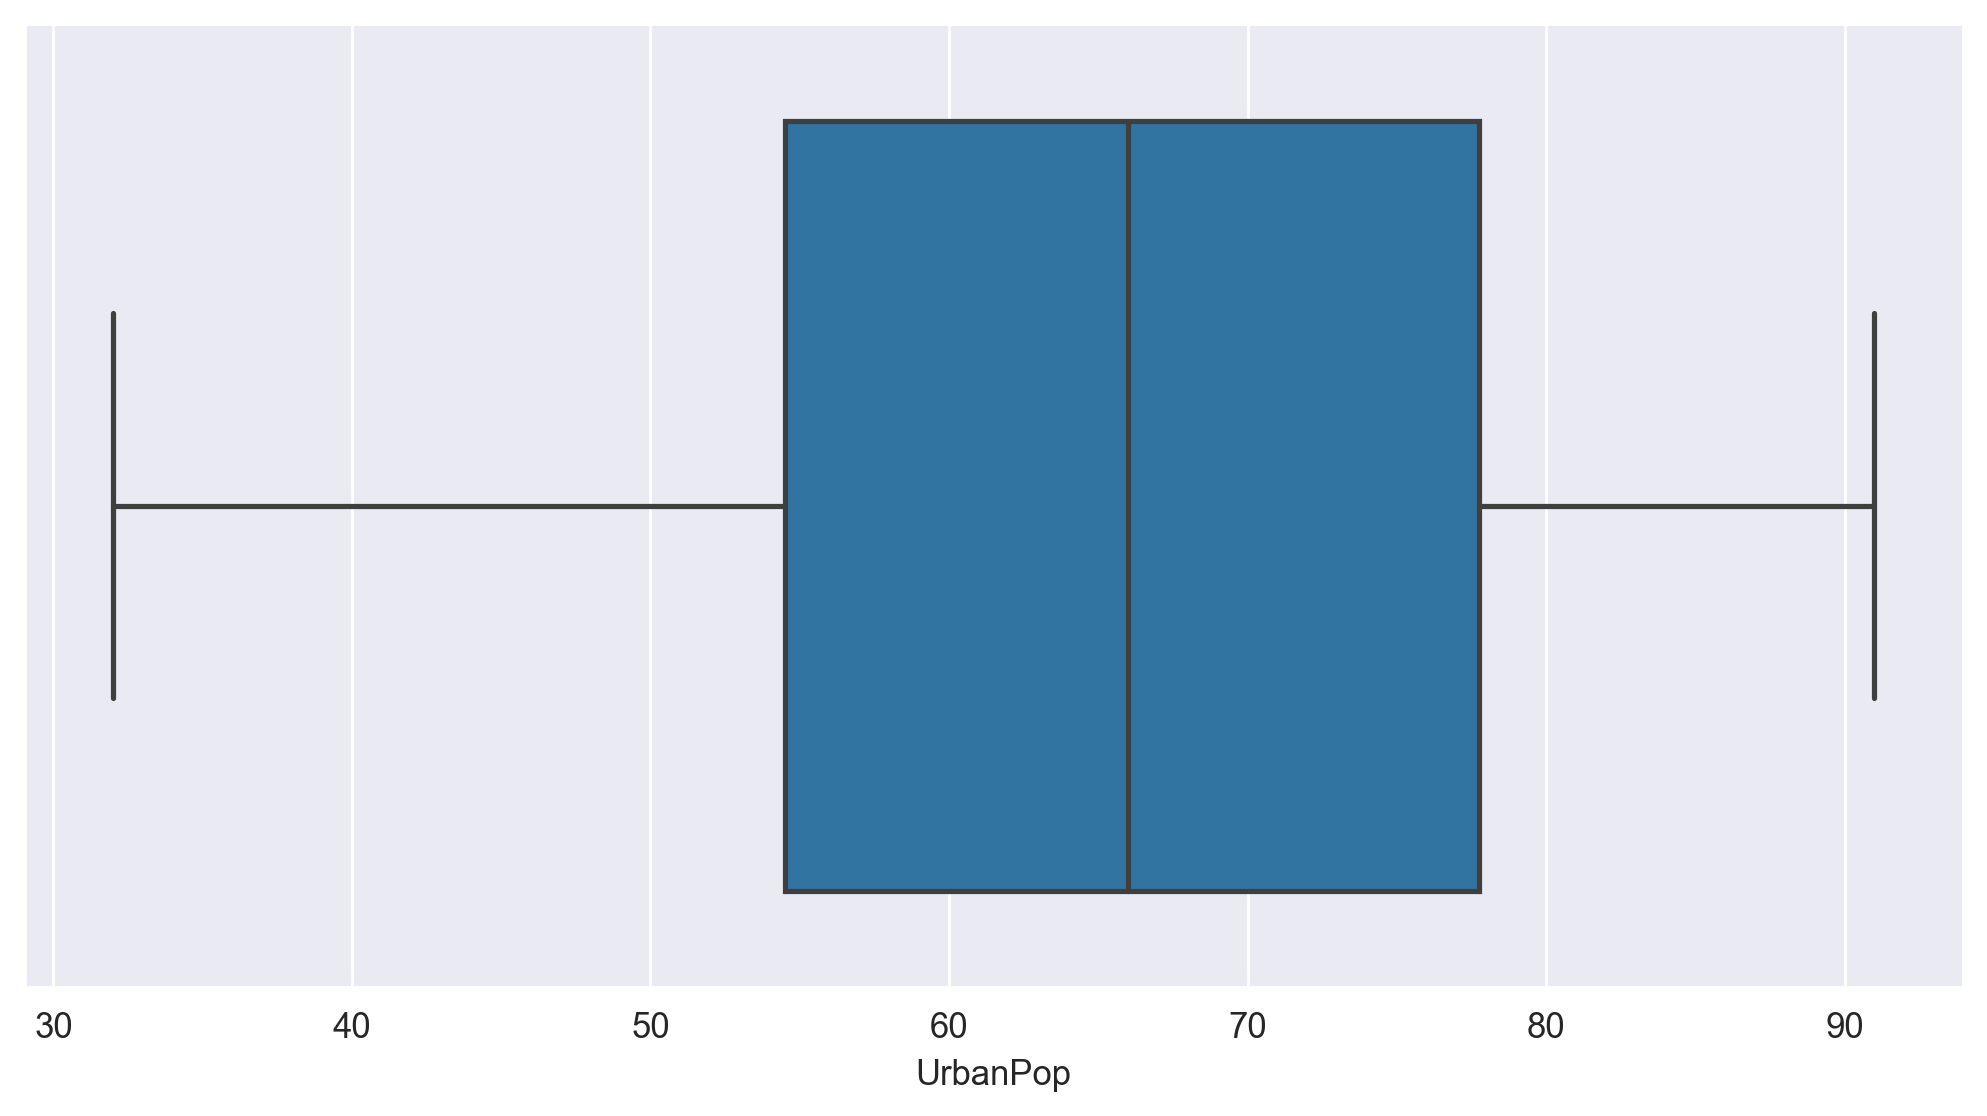

In [29]:
sns.boxplot(x=df['UrbanPop'])

<Axes: xlabel='Rape'>

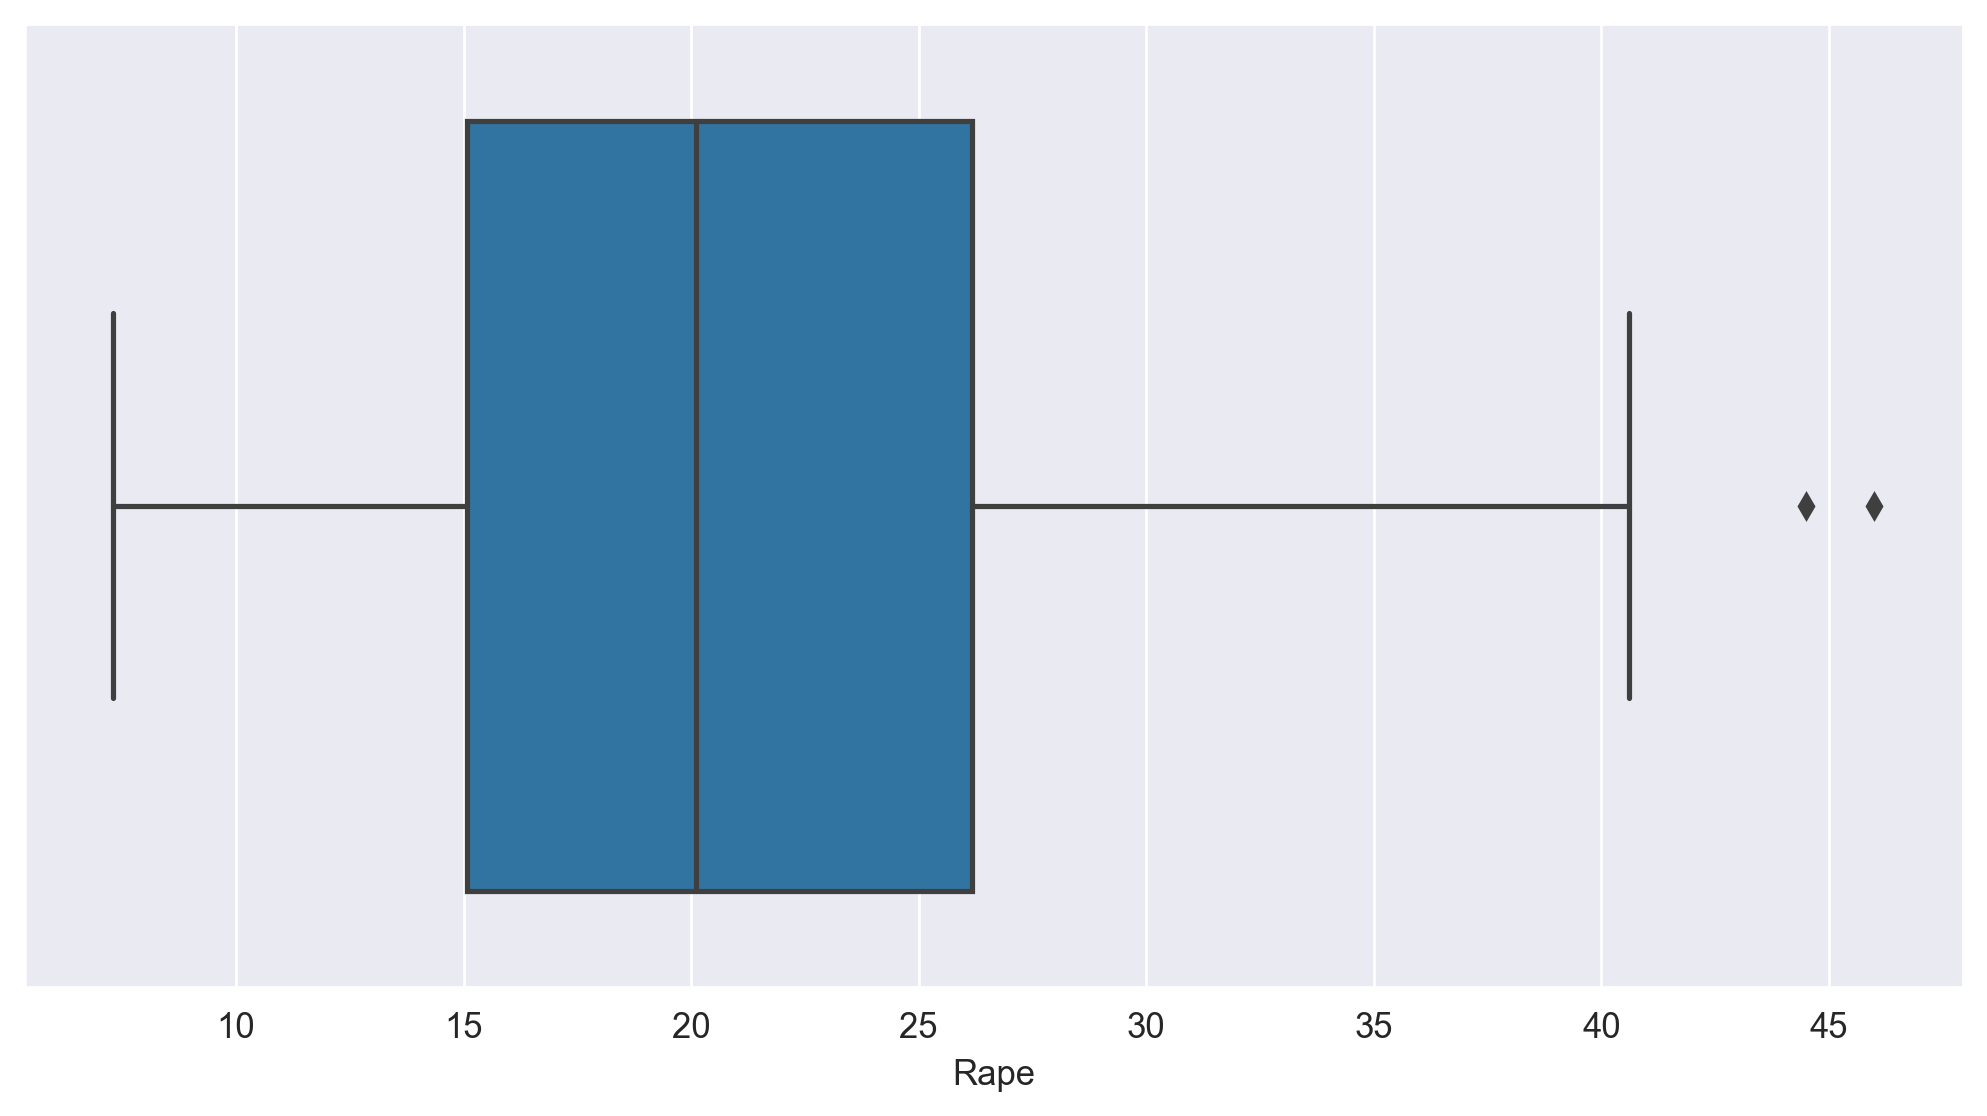

In [30]:
sns.boxplot(x=df['Rape'])

In [31]:
#There are outliers in column Rape
#Replacing the outiler with capping method

In [32]:
def outlier_detection (data,colname):
    q1=data[colname].quantile(0.25)
    q3=data[colname].quantile(0.75)
    iqr=q3-q1
    upper =q3+(1.5*iqr)
    lower = q1 - (1.5*iqr)
    return lower,upper

In [33]:
outlier_detection (df,'Rape')

(-1.5750000000000028, 42.825)

In [34]:
df.loc[df['Rape']>42.825,'Rape']=42.825
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.200
1,10.0,263,48,42.825
2,8.1,294,80,31.000
3,8.8,190,50,19.500
4,9.0,276,91,40.600
5,7.9,204,78,38.700
6,3.3,110,77,11.100
7,5.9,238,72,15.800
8,15.4,335,80,31.900
9,17.4,211,60,25.800


# Model Building

In [36]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514,  0.00719922],
       [ 0.51301858,  1.11805959, -1.22406668,  2.40232482],
       [ 0.07236067,  1.49381682,  1.00912225,  1.0926203 ],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18108811],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.15588993],
       [ 0.02597562,  0.40290872,  0.86954794,  1.94545115],
       [-1.04088037, -0.73648418,  0.79976079, -1.11144904],
       [-0.43787481,  0.81502956,  0.45082502, -0.59088995],
       [ 1.76541475,  1.99078607,  1.00912225,  1.19230183],
       [ 2.22926518,  0.48775713, -0.38662083,  0.51668259],
       [-0.57702994, -1.51224105,  1.21848371, -0.10355803],
       [-1.20322802, -0.61527217, -0.80534376, -0.76810155],
       [ 0.60578867,  0.94836277,  1.21848371,  0.31731953],
       [-0.13637203, -0.70012057, -0.03768506, -0.01495223],
       [-1.29599811, -1.39102904, -0.5959823 , -1.08929758],
       [-0.41468229, -0.67587817,  0.03210209, -0.34722399],
       [ 0.44344101, -0.

In [37]:
km = KMeans()
yp = km.fit_predict(x)
yp

array([2, 6, 0, 4, 0, 0, 1, 7, 0, 2, 1, 5, 7, 4, 5, 4, 4, 2, 5, 0, 1, 0,
       5, 2, 4, 4, 5, 0, 5, 1, 0, 7, 2, 3, 4, 4, 4, 1, 1, 2, 3, 2, 7, 1,
       3, 4, 4, 3, 5, 4])

In [38]:
len(yp)

50

In [39]:
#cluster centre
km.cluster_centers_

array([[ 0.7275494 ,  1.26502915,  0.84337776,  1.53599543],
       [-0.7029322 , -0.57371376,  1.13872696, -0.56082726],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0609956 ],
       [-1.08146728, -1.28193823, -1.78236392, -1.21666843],
       [-0.16729539, -0.34658554, -0.14236579, -0.00941437],
       [-1.18997515, -1.12955741, -0.46637758, -0.99594504],
       [ 0.51301858,  1.11805959, -1.22406668,  2.40232482],
       [ 0.51881671,  0.78472656,  1.02656904,  0.18994869]])

In [40]:
#Visualize the clusters
x[:,0]

array([ 1.25517927,  0.51301858,  0.07236067,  0.23470832,  0.28109336,
        0.02597562, -1.04088037, -0.43787481,  1.76541475,  2.22926518,
       -0.57702994, -1.20322802,  0.60578867, -0.13637203, -1.29599811,
       -0.41468229,  0.44344101,  1.76541475, -1.31919063,  0.81452136,
       -0.78576263,  1.00006153, -1.1800355 ,  1.9277624 ,  0.28109336,
       -0.41468229, -0.80895515,  1.02325405, -1.31919063, -0.08998698,
        0.83771388,  0.76813632,  1.20879423, -1.62069341, -0.11317951,
       -0.27552716, -0.66980002, -0.34510472, -1.01768785,  1.53348953,
       -0.92491776,  1.25517927,  1.13921666, -1.06407289, -1.29599811,
        0.16513075, -0.87853272, -0.48425985, -1.20322802, -0.22914211])

In [41]:
x[:,1]

array([ 0.79078716,  1.11805959,  1.49381682,  0.23321191,  1.2756352 ,
        0.40290872, -0.73648418,  0.81502956,  1.99078607,  0.48775713,
       -1.51224105, -0.61527217,  0.94836277, -0.70012057, -1.39102904,
       -0.67587817, -0.74860538,  0.94836277, -1.06375661,  1.56654403,
       -0.26375734,  1.02108998, -1.19708982,  1.06957478,  0.0877575 ,
       -0.74860538, -0.83345379,  0.98472638, -1.37890783, -0.14254532,
        1.38472601,  1.00896878,  2.01502847, -1.52436225, -0.61527217,
       -0.23951493, -0.14254532, -0.78496898,  0.03927269,  1.3119988 ,
       -1.027393  ,  0.20896951,  0.36654512, -0.61527217, -1.48799864,
       -0.17890893, -0.31224214, -1.08799901, -1.42739264, -0.11830292])

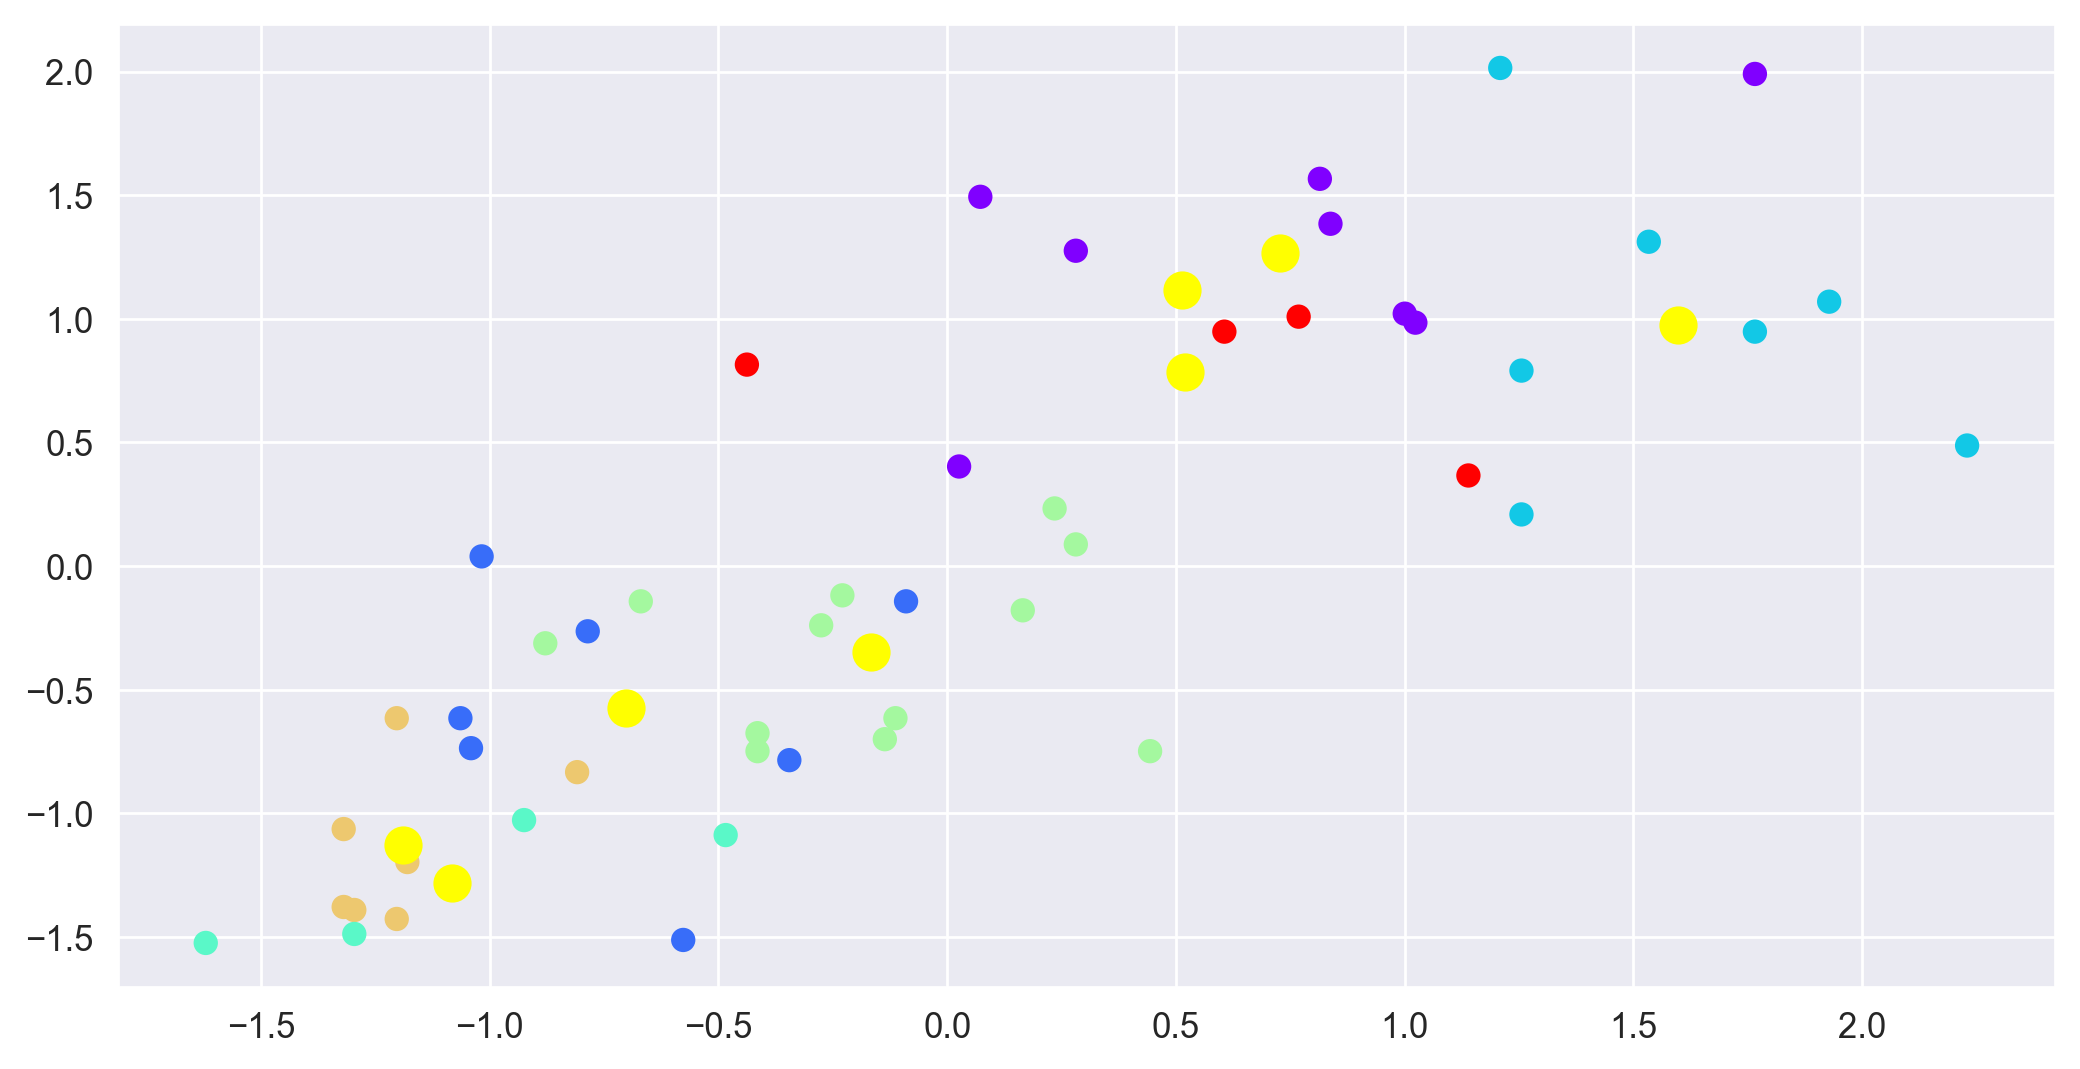

In [42]:
plt.scatter(x[:,0],x[:,1], c = yp, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow', s = 100)

In [43]:
km.inertia_

36.610083695901224

# Elbow Graph

In [44]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [45]:
wcss

[200.00000000000006,
 104.56313768454177,
 79.3162851243046,
 57.03959845669982,
 49.457692847270835,
 44.441942871829646,
 40.96168153961204,
 35.800917486291226,
 31.667010340538297,
 27.104229041785167]

Text(0.5, 1.0, 'Elbow Graph')

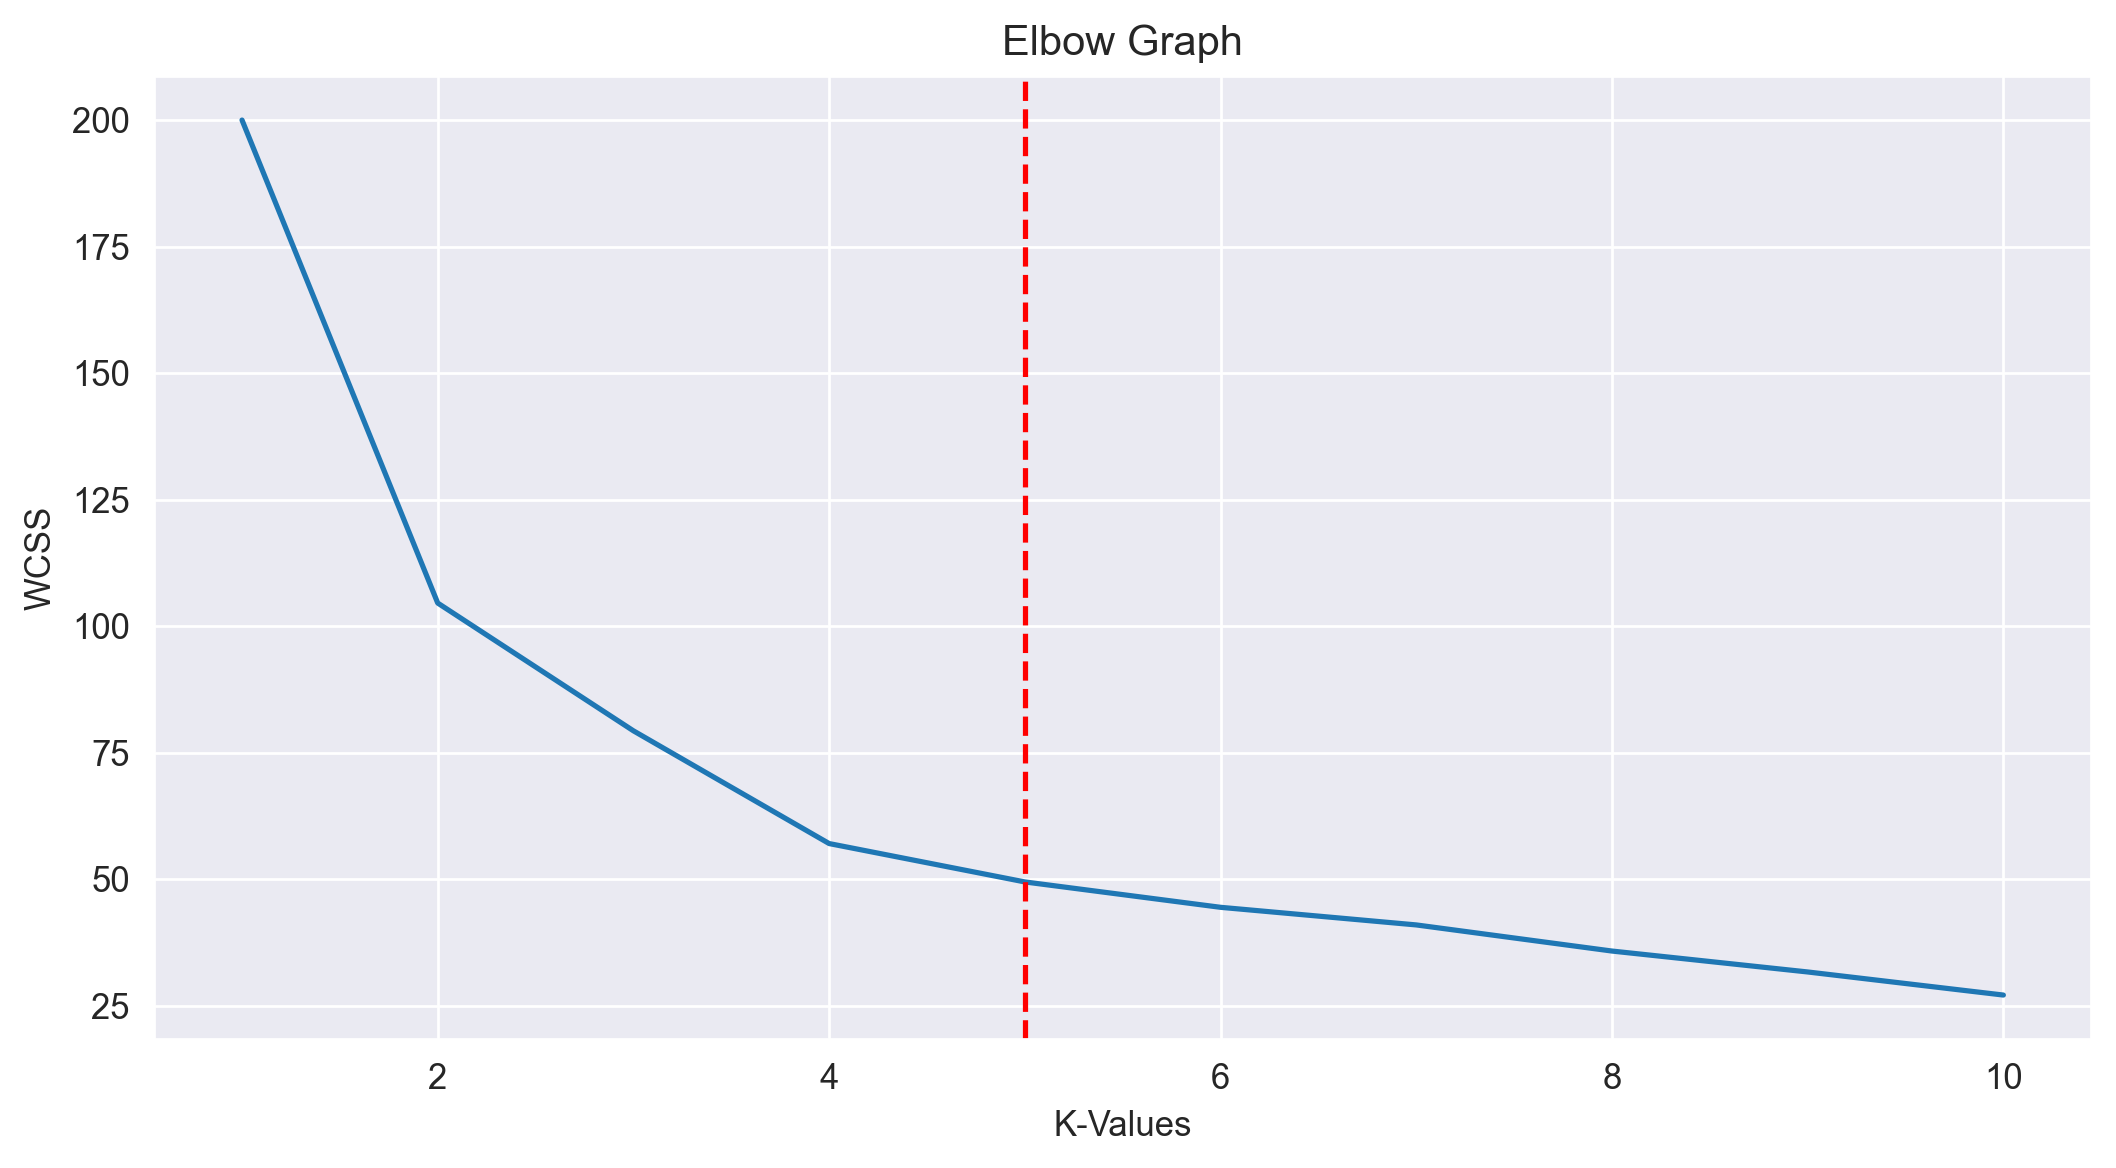

In [46]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 5, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

# Final Model

In [47]:
km = KMeans(n_clusters=5)
ypred = km.fit_predict(x)
ypred

array([4, 4, 0, 2, 0, 0, 3, 3, 0, 4, 3, 1, 0, 2, 1, 2, 2, 4, 1, 0, 3, 0,
       1, 4, 0, 2, 2, 0, 1, 3, 0, 0, 4, 1, 3, 2, 3, 3, 3, 4, 1, 4, 0, 3,
       1, 2, 3, 1, 1, 2])

In [ ]:
#Visualize the clusters

In [48]:
km.cluster_centers_

array([[ 0.71788585,  1.04432228,  0.89281033,  1.20176235],
       [-1.18467401, -1.2201201 , -1.01470522, -1.13249291],
       [-0.15956455, -0.44557535, -0.39437496, -0.32261127],
       [-0.63817386, -0.38827513,  0.88223651, -0.27472833],
       [ 1.4610129 ,  0.99381728, -0.84023734,  0.35366175]])

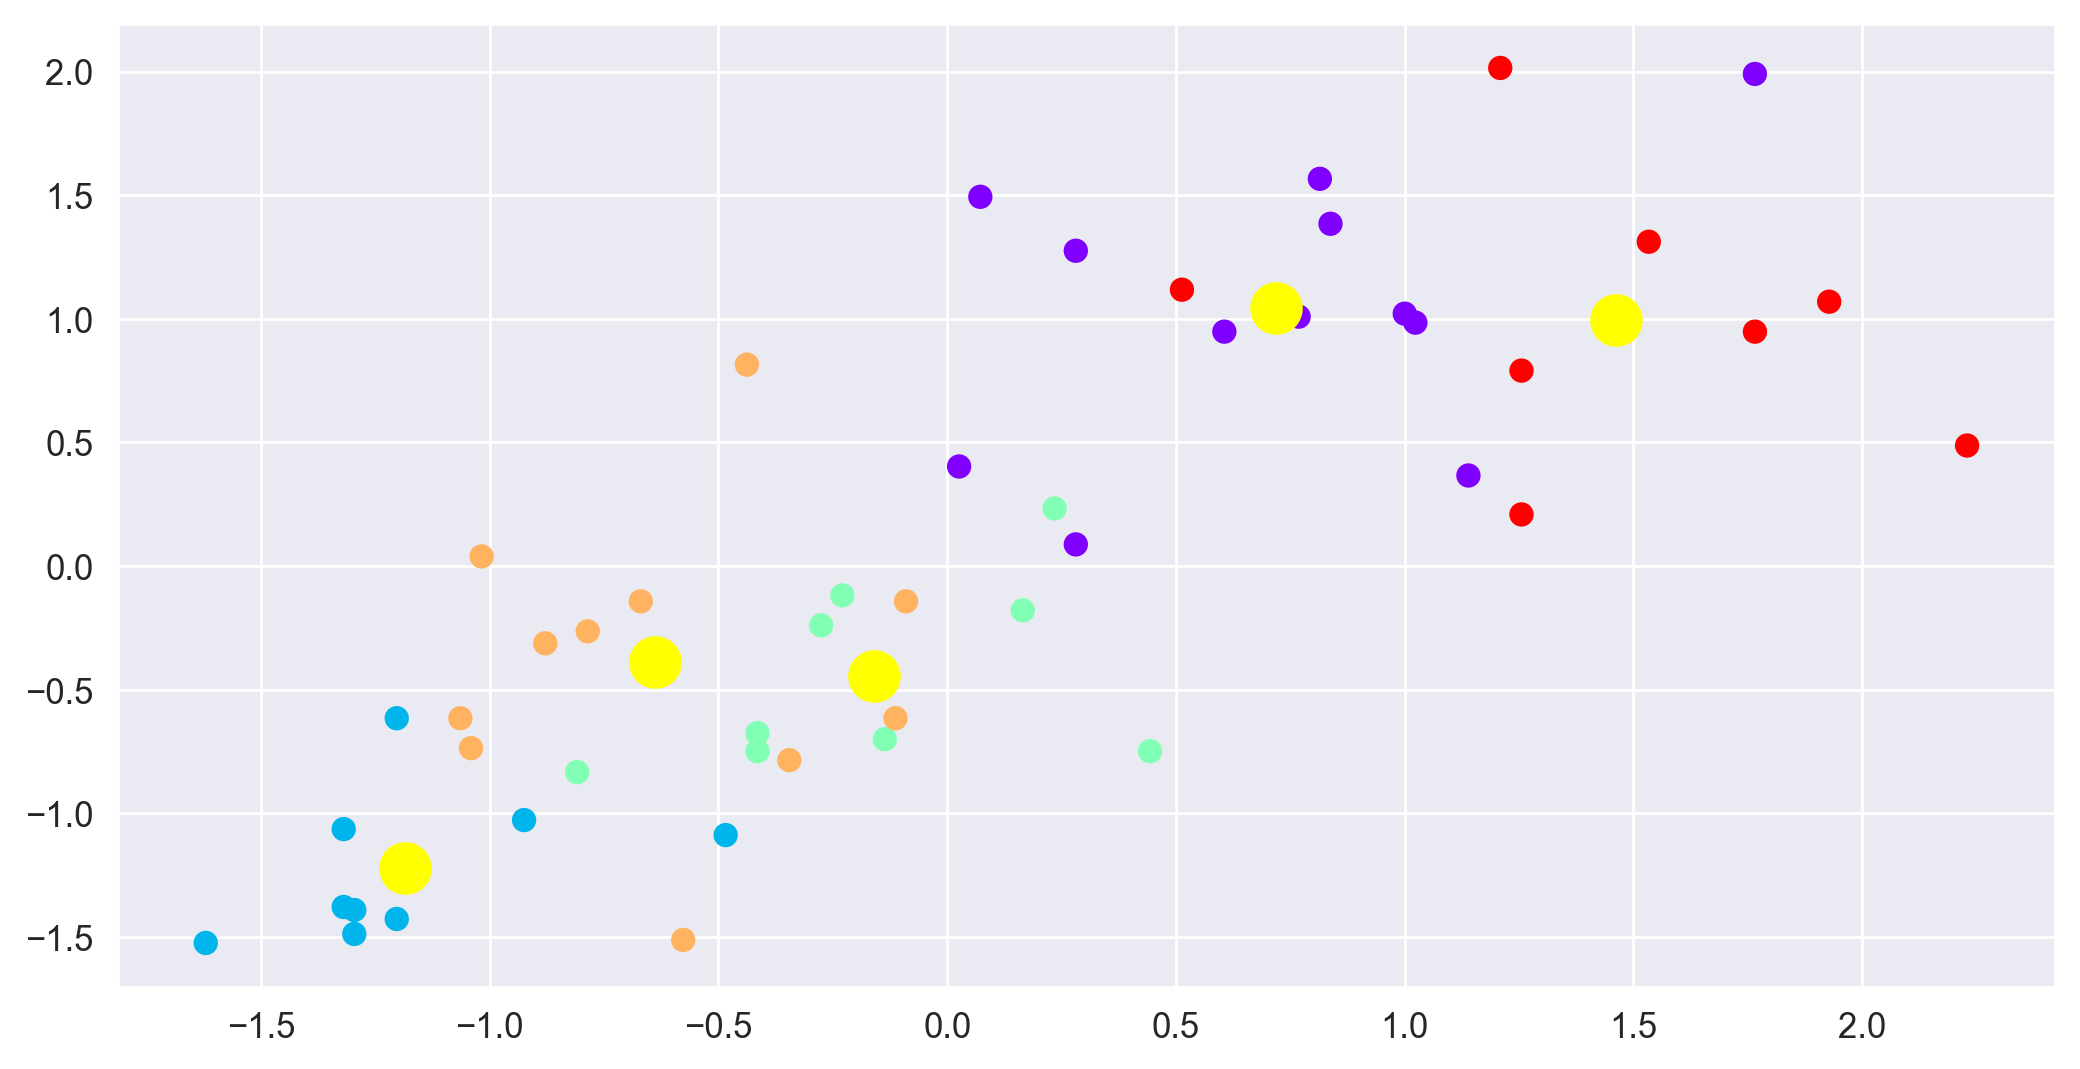

In [49]:
plt.scatter(x[:,0],x[:,1], c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow',s = 200)

# Evaluate model by silhouette Method

In [51]:
silhouette_score(x,ypred)

0.28903974563958384

In [52]:
#Analyzing clusters
df['cluster'] = ypred
df

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.200,4
1,10.0,263,48,42.825,4
2,8.1,294,80,31.000,0
3,8.8,190,50,19.500,2
4,9.0,276,91,40.600,0
5,7.9,204,78,38.700,0
6,3.3,110,77,11.100,3
7,5.9,238,72,15.800,3
8,15.4,335,80,31.900,0
9,17.4,211,60,25.800,4


In [53]:
df.groupby('cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,10.883333,256.916667,78.333333,31.985417
1,2.680000,70.100000,51.000000,10.910000
2,7.100000,134.000000,59.888889,18.222222
3,5.036364,138.727273,78.181818,18.654545
4,14.087500,252.750000,53.500000,24.328125
